# Responsible AI using SciPy
### PyData Virginia Tutorial – Andrea Hobby
#### Goal: SciPy features/modules/bias detection

## SciPy Features

It has advanced mathematical functions and algorithms for scientific and technical computing.




## SciPy Module

The main SciPy module used for this tutorial is scipy.stats. 
This module can used for statistical analysis to detect and quantify bias in datasets and model outputs. 

    
    

In [ ]:
# To install the libraries if you don't have them
!pip install numpy pandas matplotlib scipy scikit-learn


In [26]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, optimize
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

##  1. Load Data and Model

In [27]:
# change the current directory
# to specified directory
os.chdir("/Users/andre/Documents/DataScienceProjects/PyData")

In [29]:
# Read in datasets from my directory
df = pd.read_csv('casedata.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   int64  
 1   Age               8819 non-null   int64  
 2   Female            8819 non-null   int64  
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [31]:
df.describe()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
count,8819.000000,8819.000000,8819.000000,8799.000000,8367.000000,7653.000000,8706.000000,8625.000000,8628.000000,8529.000000,...,8739.000000,8819.000000,8817.000000,8819.000000,8808.000000,8796.000000,8400.000000,8783.00000,8813.000000,6000.000000
mean,4410.000000,49.358204,0.527271,0.431413,0.368591,0.417222,0.804503,79.094342,167.026854,28.294348,...,0.401419,0.233246,0.111376,0.311713,0.031449,0.066394,0.343214,0.02892,0.020424,0.077333
std,2545.970345,18.828726,0.499284,0.495302,0.482452,0.493132,0.396606,19.410707,10.099770,6.186076,...,0.490213,0.422922,0.314615,0.463220,0.174537,0.248983,0.474811,0.16759,0.141455,0.267142
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.600000,130.400000,12.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2205.500000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.400000,159.675000,24.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4410.000000,47.000000,1.000000,0.000000,0.000000,0.000000,1.000000,76.700000,166.600000,27.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6614.500000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.500000,174.200000,31.360000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,8819.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [33]:
#check for class imbalance in target variable
class_counts = df['CKD'].value_counts()


print(class_counts)
# 1 Has CKd
# 0 No CKD

CKD
0.0    5536
1.0     464
Name: count, dtype: int64


In [36]:
# Drop irrelevant or redudant columns 
df_drop = df.drop(['ID', 'Weight', 'Height', 'Obese', 'Waist'], axis=1)

In [37]:
# Drop irrelevant or redudant columns 
df_drop = df.drop(['ID', 'Weight', 'Height', 'Obese', 'Waist'], axis=1)
# Define the age bins
bins = [18, 35, 50, 65, 85]

# Define the bin labels
labels = ['18-34', '35-49', '50-64', '65 and older']

# Convert the age variable into a categorical variable
df_drop['age_group'] = pd.cut(df_drop['Age'], bins=bins, labels=labels)

# View the resulting DataFrame
print(df_drop)

      Age  Female Racegrp  Educ  Unmarried  Income CareSource  Insured    BMI  \
0      65       1   white   0.0        0.0     1.0      other      1.0  21.31   
1      36       1   hispa   0.0        NaN     1.0    noplace      0.0  22.88   
2      66       1   white   0.0        1.0     0.0    noplace      1.0  31.77   
3      54       1   white   1.0        0.0     0.0      DrHMO      1.0  26.94   
4      63       1   black   0.0        0.0     NaN     clinic      1.0  28.84   
...   ...     ...     ...   ...        ...     ...        ...      ...    ...   
8814   32       1   white   1.0        0.0     1.0      DrHMO      1.0  28.28   
8815   77       1   white   0.0        1.0     0.0     clinic      1.0  26.70   
8816   56       1   white   0.0        0.0     NaN      DrHMO      1.0  18.62   
8817   25       1   black   0.0        1.0     NaN     clinic      0.0  33.52   
8818   60       0   black   0.0        1.0     0.0    noplace      1.0  26.44   

        SBP  ...  Fam Hyper

In [38]:
bins = [0, 25, 30, 100]

# Define the bin labels
labels = ['Normal', 'Overweight', 'Obese']

# Convert the BMI variable into a categorical variable
df_drop['BMI_group'] = pd.cut(df_drop['BMI'], bins=bins, labels=labels)

# View the resulting DataFrame
print(df_drop)

      Age  Female Racegrp  Educ  Unmarried  Income CareSource  Insured    BMI  \
0      65       1   white   0.0        0.0     1.0      other      1.0  21.31   
1      36       1   hispa   0.0        NaN     1.0    noplace      0.0  22.88   
2      66       1   white   0.0        1.0     0.0    noplace      1.0  31.77   
3      54       1   white   1.0        0.0     0.0      DrHMO      1.0  26.94   
4      63       1   black   0.0        0.0     NaN     clinic      1.0  28.84   
...   ...     ...     ...   ...        ...     ...        ...      ...    ...   
8814   32       1   white   1.0        0.0     1.0      DrHMO      1.0  28.28   
8815   77       1   white   0.0        1.0     0.0     clinic      1.0  26.70   
8816   56       1   white   0.0        0.0     NaN      DrHMO      1.0  18.62   
8817   25       1   black   0.0        1.0     NaN     clinic      0.0  33.52   
8818   60       0   black   0.0        1.0     0.0    noplace      1.0  26.44   

        SBP  ...  Diabetes 

In [39]:
# one hot encoding 
# Identify categorical variables
# Select categorical variables
cat_vars = df_drop.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical variables
print(cat_vars)

['Racegrp', 'CareSource']


In [41]:
# Apply one-hot encoding to categorical variables
df_dummies = pd.get_dummies(df_drop, columns=cat_vars)
print(df_dummies)

      Age  Female  Educ  Unmarried  Income  Insured    BMI    SBP   DBP   HDL  \
0      65       1   0.0        0.0     1.0      1.0  21.31  135.0  71.0  48.0   
1      36       1   0.0        NaN     1.0      0.0  22.88   96.0  52.0  31.0   
2      66       1   0.0        1.0     0.0      1.0  31.77  115.0  57.0  44.0   
3      54       1   1.0        0.0     0.0      1.0  26.94  110.0  57.0  74.0   
4      63       1   0.0        0.0     NaN      1.0  28.84  132.0  73.0  67.0   
...   ...     ...   ...        ...     ...      ...    ...    ...   ...   ...   
8814   32       1   1.0        0.0     1.0      1.0  28.28    NaN   NaN  53.0   
8815   77       1   0.0        1.0     0.0      1.0  26.70  157.0  44.0  87.0   
8816   56       1   0.0        0.0     NaN      1.0  18.62  126.0  81.0  61.0   
8817   25       1   0.0        1.0     NaN      0.0  33.52    NaN   NaN  75.0   
8818   60       0   0.0        1.0     0.0      1.0  26.44  133.0  75.0  71.0   

      ...   BMI_group  Race

In [42]:
uint82flt = df_dummies.select_dtypes(include=['uint8']).columns.tolist()

def convert_to_float(df, column_list):
    for col in column_list:
        df[col] = df[col].astype('float64')
    return df

new_df = convert_to_float(df_dummies, uint82flt)

In [43]:
def convert_to_float64(df, column_names):
    for column_name in column_names:
        df[column_name + '_flt'] = df[column_name].astype('category').cat.codes.astype('float64')
    return df

In [44]:
#category columns

new_df = convert_to_float64(new_df, ['age_group', 'BMI_group'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 8819 non-null   int64   
 1   Female              8819 non-null   int64   
 2   Educ                8799 non-null   float64 
 3   Unmarried           8367 non-null   float64 
 4   Income              7653 non-null   float64 
 5   Insured             8706 non-null   float64 
 6   BMI                 8529 non-null   float64 
 7   SBP                 8511 non-null   float64 
 8   DBP                 8439 non-null   float64 
 9   HDL                 8802 non-null   float64 
 10  LDL                 8801 non-null   float64 
 11  Total Chol          8803 non-null   float64 
 12  Dyslipidemia        8819 non-null   int64   
 13  PVD                 8819 non-null   int64   
 14  Activity            8809 non-null   float64 
 15  PoorVision          8252 non-null   fl

In [45]:
# Drop variables that have categories 
new_array = new_df.drop(['Age', 'BMI', 'age_group', 'BMI_group'], axis=1)

In [46]:
# Drop rows with NaN in the target column
#missing target variable can cause errors during model training 
#because scikit-learn assumes that the target variable is complete and does not contain any missing values.

ckdarray = new_array.dropna(inplace=True)

In [47]:
def split_data(new_array):
    X = new_array.drop(['CKD'], axis=1)
    y = new_array['CKD']
    return X, y

In [48]:
X, y = split_data(new_array)

print(X)
print(y)

      Female  Educ  Unmarried  Income  Insured    SBP   DBP   HDL    LDL  \
0          1   0.0        0.0     1.0      1.0  135.0  71.0  48.0  249.0   
2          1   0.0        1.0     0.0      1.0  115.0  57.0  44.0  211.0   
3          1   1.0        0.0     0.0      1.0  110.0  57.0  74.0  156.0   
5          0   1.0        0.0     0.0      1.0  129.0  70.0  43.0  159.0   
6          0   1.0        0.0     0.0      0.0  137.0  92.0  41.0  143.0   
...      ...   ...        ...     ...      ...    ...   ...   ...    ...   
5995       0   0.0        0.0     0.0      1.0  149.0  77.0  33.0  189.0   
5996       0   0.0        0.0     1.0      1.0  130.0  75.0  38.0  123.0   
5997       0   1.0        1.0     0.0      1.0  126.0  83.0  40.0  131.0   
5998       0   0.0        1.0     0.0      1.0  129.0  50.0  58.0  134.0   
5999       1   1.0        0.0     1.0      1.0   95.0  59.0  52.0  102.0   

      Total Chol  ...  Racegrp_hispa  Racegrp_other  Racegrp_white  \
0          297.0 

##  2. Check for Bias & Fairness

In [49]:

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.94


In [55]:
# Assuming y_test, y_pred, and X_test are already defined
df_results = pd.DataFrame({"y_true": y_test, "y_pred": y_pred, "sensitive_attr": X_test["Female"]})

# Group accuracy
group_acc = df_results.groupby("sensitive_attr").apply(lambda g: accuracy_score(g["y_true"], g["y_pred"]))
print("Accuracy by group:\n", group_acc)

# Perform chi-square test using SciPy Stats module
# The chi-square test is a way to figure out if there’s a real difference 
# between what you see in your data and what you’d expect if there was no connection
# between your variables. Its used mostly with categorical data like gender, blood type, 
# or survey answers. It helps you check if two groups are related, or if the way your data
# falls into categories is just what you’d expect by random chance.

If a result is “significant,” that means the gap between what you observed and what you expected is big enough that it probably didn’t happen just by luck. 
contingency = pd.crosstab(df_results["y_pred"], df_results["sensitive_attr"])
chi2, p, _, _ = stats.chi2_contingency(contingency)
print(f"\nChi-square p-value for fairness test: {p:.4f}")



Accuracy by group:
 sensitive_attr
0    0.940692
1    0.935821
dtype: float64

Chi-square p-value for fairness test: 1.0000


## 3. Robustness – Add Noise + Analyze Performance

In [56]:
# Add noise to test set
X_test_noisy = X_test.copy()
X_test_noisy.iloc[:, :-1] += np.random.normal(0, 0.5, X_test_noisy.iloc[:, :-1].shape)

# Predict on noisy test
# The ideal accuracy is close the accuracy in the previous line ot ouptut. 

y_pred_noisy = model.predict(X_test_noisy)
print("Accuracy on noisy test data:", accuracy_score(y_test, y_pred_noisy))



Accuracy on noisy test data: 0.9389193422083008


## 4. Transparency – Feature Importance

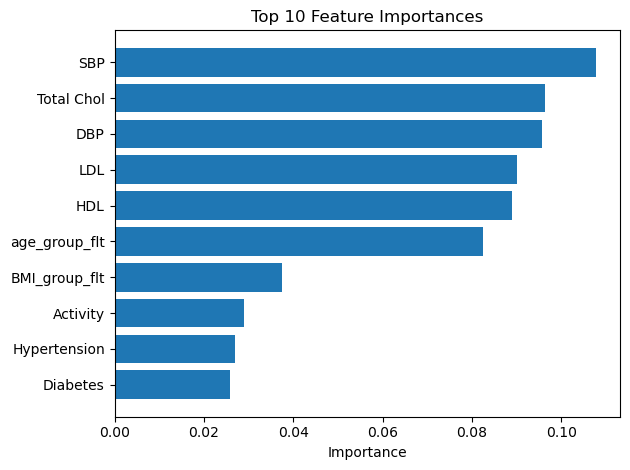

In [57]:
# Feature importances
# Here I used the matplotlib and NumPy library to display the most important features for predicing Chronic Kidney Disease 
importances = model.feature_importances_
features = X.columns

sorted_idx = np.argsort(importances)[-10:]
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## 5. Resources

Hobby, A. (2023). Predicting Chronic Kidney Disease-Resample [https://github.com/AndreaHobby/CKD-Prediction/blob/main/Predicting%20Chronic%20Kidney%20Disease-Resample.ipynb]
